## Data Loading

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../data/Copy of BrentOilPrices.csv')

In [4]:
data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [6]:
# Convert the 'Date' column to datetime format if it exists
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for any rows where the date conversion failed
print(data[data['Date'].isnull()])


C:\Users\NurselamHussen-ZOAEt\AppData\Local\Temp\ipykernel_23228\3038581729.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


Empty DataFrame
Columns: [Date, Price]
Index: []


In [7]:
data.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [8]:
# Check for missing values in all columns
print(data.isnull().sum())

Date     0
Price    0
dtype: int64


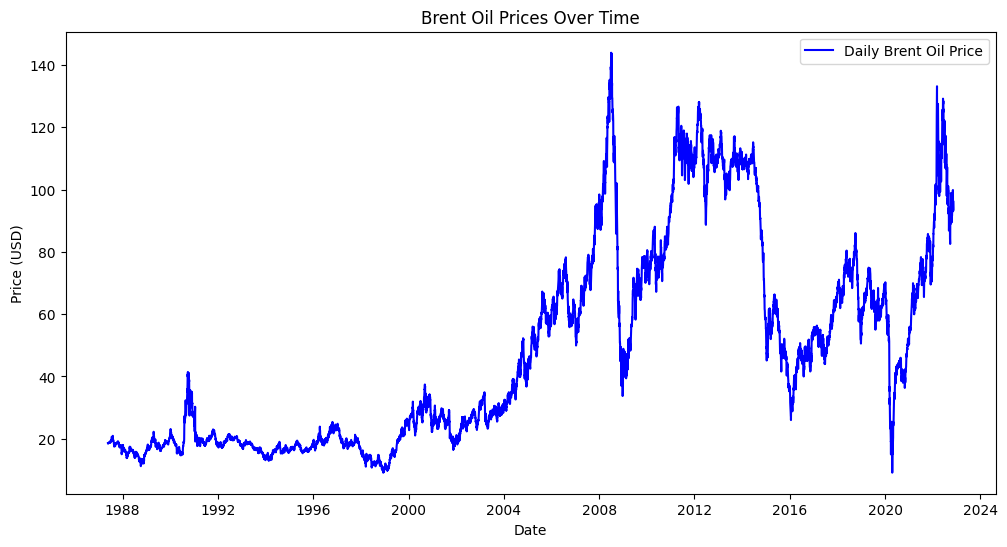

In [9]:
import matplotlib.pyplot as plt

# Plot the daily Brent oil prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], color='blue', label='Daily Brent Oil Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


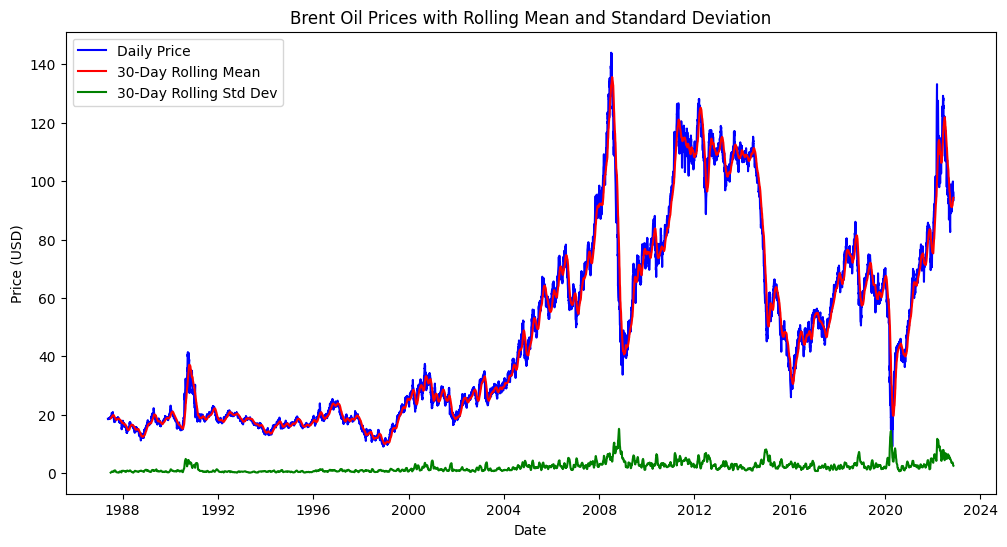

In [10]:
# Define window size for rolling statistics (e.g., 30 days)
window = 30

# Calculate rolling mean and standard deviation
data['Rolling_Mean'] = data['Price'].rolling(window=window).mean()
data['Rolling_Std'] = data['Price'].rolling(window=window).std()

# Plot rolling statistics along with actual prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], color='blue', label='Daily Price')
plt.plot(data['Date'], data['Rolling_Mean'], color='red', label='30-Day Rolling Mean')
plt.plot(data['Date'], data['Rolling_Std'], color='green', label='30-Day Rolling Std Dev')
plt.title('Brent Oil Prices with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
